In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import external
from skimage import io

import scipy
from scipy import ndimage as ndi
import skimage
from skimage import feature
from skimage.filters import sobel

from simple_functions import floorValues
from simple_functions import matrixViz

In [5]:
with skimage.external.tifffile.TiffFile('test.tif') as tif:
    data = tif.asarray()
tif.close()

In [6]:
#agrregate to greyscale

data[0] = data[0]/3
data[1] = data[1]/3
data[2] = data[2]/3

sum_mat = data[0]+data[1]+data[2]

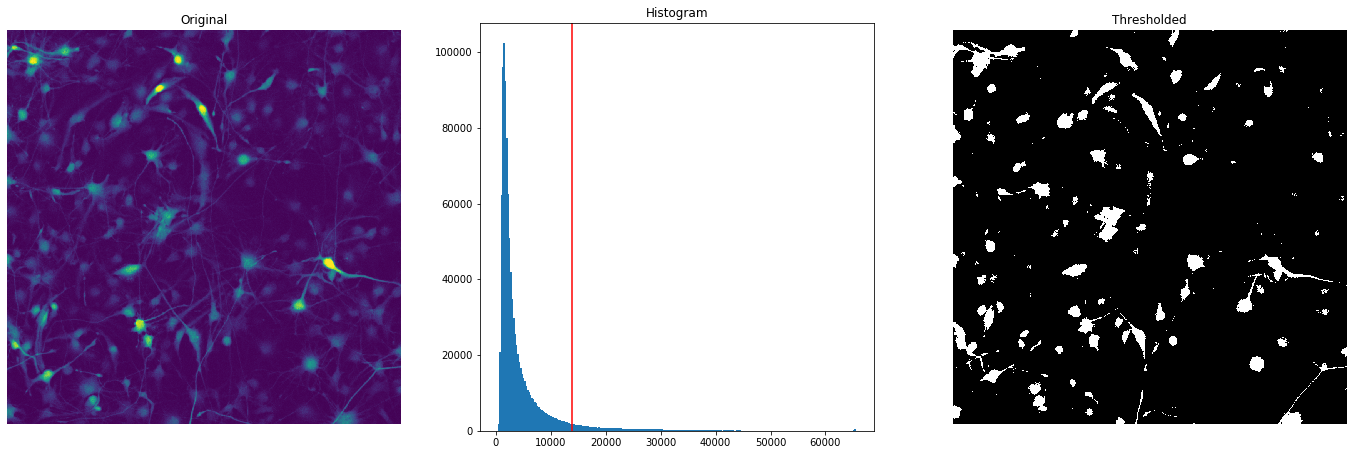

In [38]:
#apply globl otsu threshold
#will need local thresholding to find tails
#does better job segmenting high value cells close together

image = sum_mat
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(24, 7.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image)#, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

In [15]:
#apply gaussian filter
gauss = skimage.filters.gaussian(sum_mat)

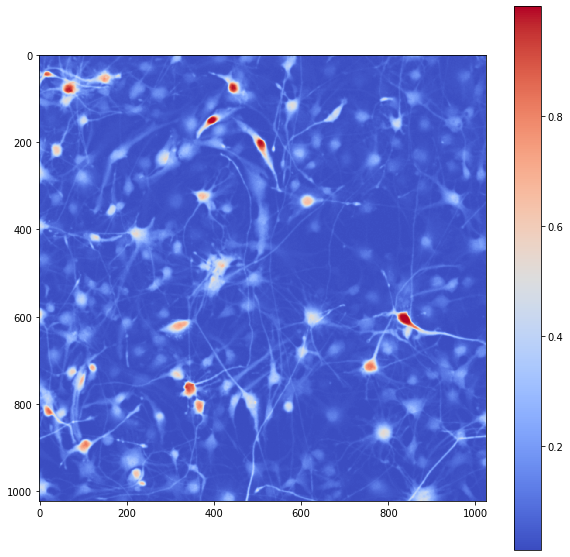

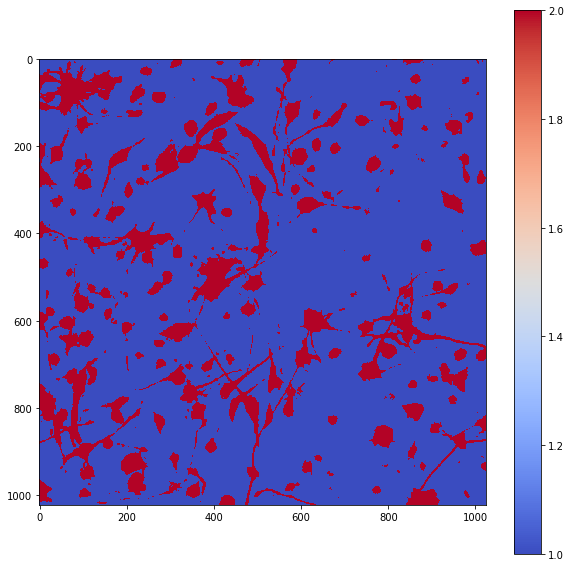

In [43]:
#set markers at fairly low value
#apply sobel edge detection and watershed
#try diameter clsoing to keep tails and segment
#attempt k means with filter and nuclei marker


markers = np.zeros_like(gauss)
markers[gauss <0.1] = 1
markers[gauss >= 0.1] = 2

sobel_filter = sobel(gauss)

from skimage.morphology import watershed
segmentation = watershed(sobel_filter, markers)

matrixViz(gauss)
matrixViz(segmentation)

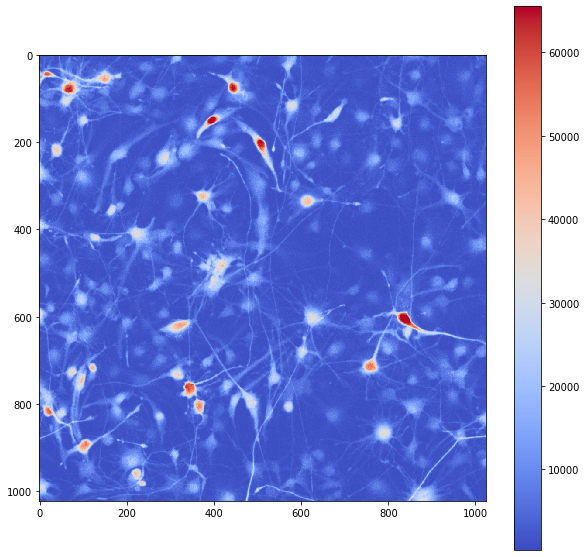

In [14]:
matrixViz(sum_mat)